In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold, GridSearchCV




plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["font.size"] = 18



In [110]:
steam_df = pd.read_csv("Data/steam/games-features-edit.csv")


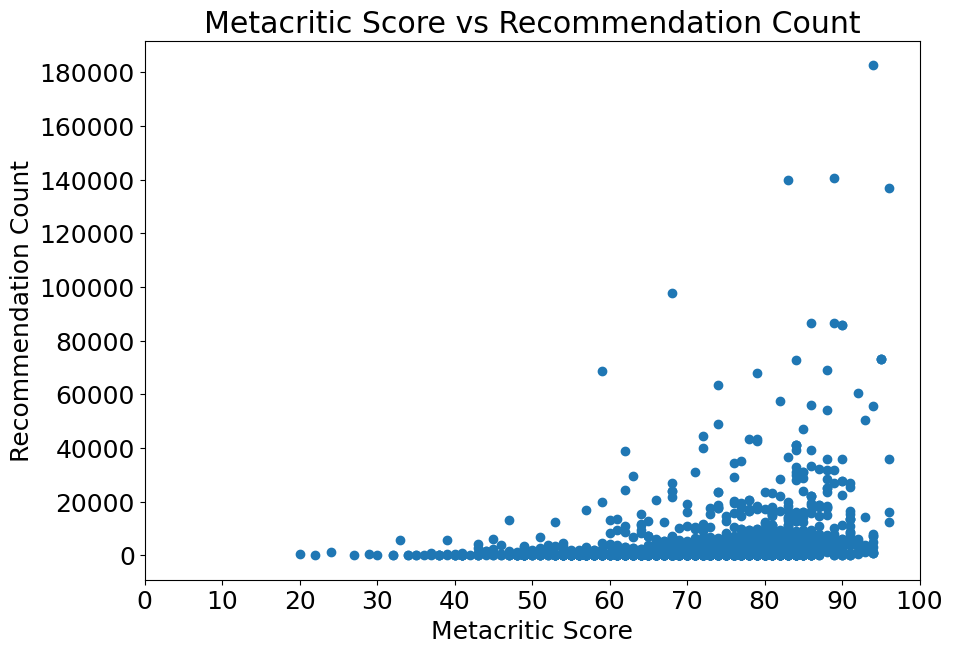

In [111]:
recvsmeta_df = steam_df.dropna(subset=['Metacritic'])
recvsmeta_df = recvsmeta_df[steam_df['Metacritic'] != 0]
recvsmeta_df = recvsmeta_df.dropna(subset=['RecommendationCount'])

recvsmeta_df = recvsmeta_df[recvsmeta_df['GenreIsNonGame'] == 0]

test_df = steam_df[steam_df['RecommendationCount'] < 5000]

temp_df = recvsmeta_df[(recvsmeta_df['RecommendationCount'] < 200000)]
plt.scatter(temp_df['Metacritic'], temp_df['RecommendationCount'])
plt.xlabel('Metacritic Score')
plt.ylabel('Recommendation Count')
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 200000, 20000))
plt.title('Metacritic Score vs Recommendation Count')
plt.show()


Training Data:
Mean squared error:  1.211018076554341
R^2:  0.01150468749732847

Testing Data:
Mean squared error:  0.09406610910353298
R^2:  0.06206191891962054

Coefficient:  [[0.01018877]]
Intercept:  [-0.72738777]


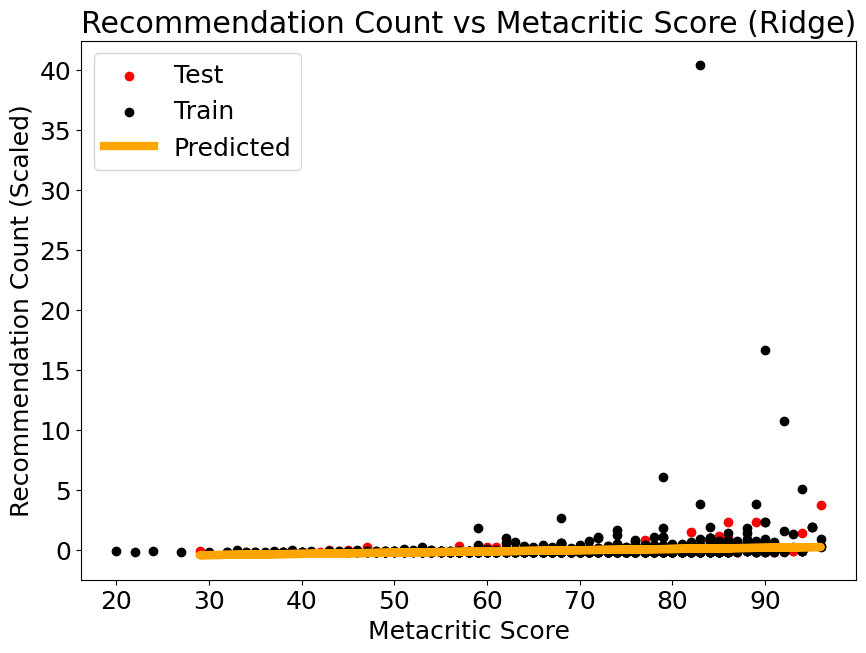

Mean Absolute Error: 0.1675276023936744
Mean Squared Error: 0.09406610910353298
Root Mean Squared Error: 0.30670198744633687


In [112]:
#split recvsmeta_df into train and test sets
X = recvsmeta_df['Metacritic'].values.reshape(-1, 1)
y = recvsmeta_df['RecommendationCount'].values.reshape(-1, 1)


scaler = StandardScaler()
scaler.fit(y)
y_0 = scaler.transform(y)



X_train, X_test, y_train, y_test = train_test_split(X, y_0, test_size=0.2, random_state=42)


kfold = KFold(n_splits=5, random_state=42, shuffle=True)



regressor = Ridge()

grid_search = GridSearchCV(estimator = regressor, param_grid = {'alpha': [0.1, 1, 10, 100, 1000, 10000]}, cv=kfold, n_jobs=-1)



grid_search.fit(X_train, y_train)

regressor = Ridge(alpha=grid_search.best_params_['alpha'])


regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_train)
print("Training Data:")
print("Mean squared error: ", mean_squared_error(y_train, y_pred))
print("R^2: ", r2_score(y_train, y_pred))

y_pred = regressor.predict(X_test)
print("\nTesting Data:")
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("R^2: ", r2_score(y_test, y_pred))

print("\nCoefficient: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

#plot results
plt.scatter(X_test, y_test, color='red')
plt.scatter(X_train, y_train, color='black')
plt.plot(X_test, y_pred, color='orange', linewidth=6)
plt.legend(['Test', 'Train', 'Predicted'])
plt.title('Recommendation Count vs Metacritic Score (Ridge)')
plt.xlabel('Metacritic Score')
plt.ylabel('Recommendation Count (Scaled)')
plt.show()

#calculate accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))




Training Data:
Mean squared error:  1.2190094587744245
R^2:  0.0049817098325808384

Testing Data:
Mean squared error:  0.0969146563135547
R^2:  0.03365890608644395

Coefficient:  [0.0026226]
Intercept:  [-0.18268576]


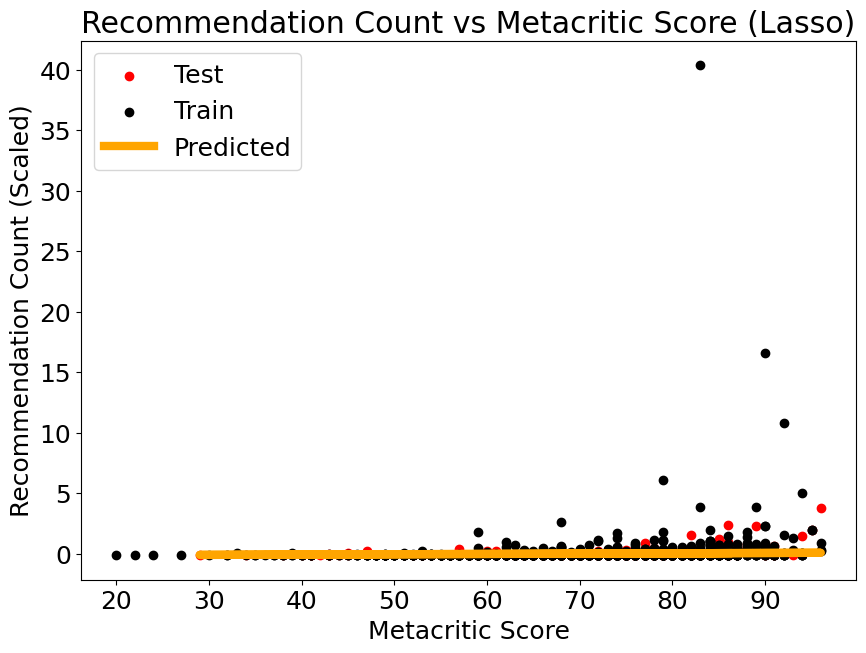

Mean Absolute Error: 0.15620419365906144
Mean Squared Error: 0.0969146563135547
Root Mean Squared Error: 0.3113111888666302


In [113]:
#split recvsmeta_df into train and test sets
X = recvsmeta_df['Metacritic'].values.reshape(-1, 1)
y = recvsmeta_df['RecommendationCount'].values.reshape(-1, 1)

scaler = StandardScaler()
scaler.fit(y)
y_1 = scaler.transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_1, test_size=0.2, random_state=42)

kfold = KFold(n_splits=5, random_state=42, shuffle=True)



regressor = Lasso()

grid_search = GridSearchCV(estimator = regressor, param_grid = {'alpha': [0.1, 1, 10, 100, 1000, 10000]}, cv=kfold, n_jobs=-1)


grid_search.fit(X_train, y_train)

regressor = Lasso(alpha=grid_search.best_params_['alpha'])

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_train)
print("Training Data:")
print("Mean squared error: ", mean_squared_error(y_train, y_pred))
print("R^2: ", r2_score(y_train, y_pred))

y_pred = regressor.predict(X_test)
print("\nTesting Data:")
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("R^2: ", r2_score(y_test, y_pred))

print("\nCoefficient: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

#plot results
plt.scatter(X_test, y_test, color='red')
plt.scatter(X_train, y_train, color='black')
plt.plot(X_test, y_pred, color='orange', linewidth=6)
plt.legend(['Test', 'Train', 'Predicted'])
plt.title('Recommendation Count vs Metacritic Score (Lasso)')
plt.xlabel('Metacritic Score')
plt.ylabel('Recommendation Count (Scaled)')
plt.show()

#calculate accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))